# **Movie Recommendation 2022**
## Using unsupervised Learning skills to generate movie recommendations

![](https://i.pinimg.com/originals/a6/3c/7f/a63c7fb4604fee58c553e7d8d43aa6ac.jpg)

# <a id="contents">Table of Contents</a><br>
1. [**Introduction**](#introduction)
  > 1.1 [**Problem Statement**](#problem_statement) <br>
    1.2 [**Data Description**](#data)<br>
    1.3 [**Importing Libraries**](#importing_libraries)<br>
    1.4 [**Loading Data**](#loading_data) <br>
    
2. [**Exploratory Data Analysis**](#EDA) <br>
   
3. [**Modeling**](#model) <br>
>   4.1 [**Model Preprocessing**](#modelpreprocessing)<br>
    4.2 [**Model Training**](#modeltraining) <br>
    >> 4.2.1. [**Model 1**](#model1) <br>
     4.2.2. [**Model 2**](#model2) <br>
     4.2.3. [**Model 3**](#model3) <br><br>
    
4. [**Conclusion and Recommendation**](#Conclusion/Recommendation) <br>
   > 5.1 [**Conclusion**](#Conclusion) <br>
     5.2 [**Recommendation**](#Recommendation) <br><br>

5. [**References**](#reference) <br>

# 1.0 <a id="introduction"><strong>INTRODUCTION</strong></a>
[Table of Contents](#contents)<br>
In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.
![](https://research.aimultiple.com/wp-content/uploads/2017/08/recommendation-system.png)


## 1.1 <a id="problem_statement"><strong>PROBLEM STATEMENT</strong></a>
[Table of Contents](#contents)<br>
To construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.<br><br> Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.






# 1.2 <a id="data"><strong>DATA DESCRIPTION</strong></a>
[Table of Contents](#contents)<br>
**Data Overview** <br>
This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems. For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.<br>
**Source** <br>
The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB<br> **Supplied Files:**<br>
* genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
* genome_tags.csv - user assigned tags for genome-related scores
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.>* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

### Data Definitions

**Numeric**
* **budget:** - (continuous) dollar cost of production of the movie.
* **rating:** - (discrete) users rating of a movie from. **TARGET**
* **relevance:** - (continuous) measure (0-1) of the relevance of a genome tag to the movie, where 1 impies 100% relevance.
* **runtime:** - (continuos) movie duration in minutes.
* **timestamp:** - (continuous) the time at which a user rated the movie.


**Categorical**
* **director:** - (nominal) the person who controls the making of a film and supervises the actors and technical crew.
* **genres:** - (nominal) the style or category of the movie. A movie may belong to multiple (up to nineteen) genres, or may be absent a genre listing.
* **imdbId:** - (nominal) unique indentifying key for each IMBD entry. Can also be used in conjunction with the TMDB API.
* **movieId:** - (nominal) a unique identifier for each movie. There are 48,213 unique movies.
* **plot_keywords:** - (nominal) key words used to identify characteristics of a movie's storyline.
* **tag:** - (nominal) genome label
* **tagId:** - (nominal) unique genome identifier.
* **tmdbId:** - (nominal) unique identifier that works in conjunction with the TMDB API.
* **title:** - (nominal) the unique title identifying the movie. Included is a year of release enclosed in parenthesis at the end of the title.
* **title_cast:** - (nominal) the actors of the main characters in the movie. This does not include extras.
* **userId:** - (nominal) a unique identifier for each user. There are 162,541 unique users.

*The Movie Genome concept is borrowed from the Human Genome Project, a scientific project to identify and map all human genes. Similarly, a Movie Genome identifies and indexes multiple “genes” (elements and aspects) of a movie.*


 ## 1.3  <a id="importing_libraries"><strong>IMPORTING LIBRARIES</strong></a>
[Table of Contents](#contents)<br>
Here We imported the libraries needed for training, testing and exploring our dataset such as pandas, scikit learn, numpy, matplotlib, etc.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

# Install Prerequisites
# import sys
# !{sys.executable} -m pip install scikit-learn scikit-surprise
# !pip install git+https://github.com/gbolmier/funk-svd

# Exploratory Data Analysis
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
import random
from time import time
import cufflinks as cf
from sklearn import manifold
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Display
%matplotlib inline
sns.set(font_scale=1.5)
sns.set_style("white")
pd.set_option('display.max_columns', 37)

## 1.4 <a id="loading_data"><strong>LOADING DATA</strong></a>
[Table of Contents](#contents)


#### Train and Test data:


In [2]:
#import train and test data 
train = pd.read_csv("../input/edsa-movie-recommendation-2022/train.csv") #importing train csv from kaggle
test = pd.read_csv("../input/edsa-movie-recommendation-2022/test.csv") #importing test csv from kaggle

FileNotFoundError: [Errno 2] No such file or directory: '../input/edsa-movie-recommendation-2022/train.csv'

In [ ]:
train.head() #Load train data

In [ ]:
test.head() #Load test data

It is noted that the train data includes an additiona column "timestamp" We can be safely drop this data because there is no reasonable relationship between the time someone watches a movie and whether or not they rate it favourably.

#### Movie Data:

In [ ]:
#import movies data
movies =  pd.read_csv('../input/edsa-movie-recommendation-2022/movies.csv', index_col='movieId') #importing movies csv from kaggle
imdb =  pd.read_csv('../input/edsa-movie-recommendation-2022/imdb_data.csv', index_col='movieId') #importing imbd csv from kaggle
links =  pd.read_csv('../input/edsa-movie-recommendation-2022/links.csv', index_col='movieId') #importing links csv from kaggle
genome_scores =  pd.read_csv('../input/edsa-movie-recommendation-2022/genome_scores.csv', index_col='movieId') #importing genome_scores csv from kaggle
genome_tags =  pd.read_csv('../input/edsa-movie-recommendation-2022/genome_tags.csv', index_col='tagId') #importing genome_tags csv from kaggle
tags = pd.read_csv('../input/edsa-movie-recommendation-2022/tags.csv') #importing tags csv from kaggle

# 2.0 <a id="EDA"><strong>EXPLORATORY DATA ANALYSIS</strong></a>
[Table of Contents](#contents)

This phase is extremely important. It helps us to understand patterns in our data, pinpoint any outliers and indicate relationships between variables. This phase includes descriptive statistics and data visualisations.

### Why is EDA important? <br>
Exploratory Data Analysis (EDA) helps us to understand our data without making any assumptions. EDA is a vital component before we continue with the modelling phase as it provides context and guidance on the course of action to take when developing the appropriate model. It will also assist in interpreting the results correctly. Without doing EDA you will not understand your data fully.

### The different types of EDA <br>
EDA are generally classified in two ways:

1) Non-graphical or Graphical
2) Univariate or Multivariate


![](https://raw.githubusercontent.com/Explore-AI/Pictures/f860f39251c523eda779dea0140316ccbefdd8e0/eda_map.jpg)

* <b>Non-graphical EDA</b>: Involves calculations of summary/descriptive statistics.
* <b>Graphical EDA</b>: This type of analysis will contain data visualisations.<br>

* <b>Univariate Analysis</b>: This is performed on one variable at a time as the prefix 'uni' indicates.
* <b>Multivariate Analysis</b>: This type of analysis explores the relationship between two or more variables. When only comparing two variables it is known as bivariate analysis as indicated by the prefix 'bi'.
Read a more detailed explanation [here](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf)

For the EDA process, the following steps will be covered:
1. **Data Summary**
2. **Null Values**
3. **Explore Target Variable**
4. **Explore Gernre Variable**
5. **Explore IMDB Dataset**

## 2.1 <a id="data_summary"><strong>Data Summary</strong></a>
[Table of Contents](#contents)

Data summary will be done so as to provide information/metadata about all the data sets such as number of records and columnsper data set, column datatypes etc. This is a good process to start with as it will reveal the nature of the datasets which will guide us on how to handle them.

We will start by looking into the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

In [4]:
train_df.info()

In [5]:
test_df.info()

In [6]:
movies_df.info()

In [7]:
imdb_df.info() 

In [8]:
links_df.info() 

In [9]:
genome_scores.info() 

In [10]:
genome_tags.info()

## 2.2 <a id="null_values"><strong>Null Values</strong></a>
[Table of Contents](#contents)

While imporing a DataFrame from a csv file, blank data entries are usually imported as null value. This can later create problems while operating that data frame, more so during the modelling phase.

We will check for null values for every dataset and, if possible/necessary, we will immediately handle these values. 

In [11]:
print("Train: ")
print(str(train_df.isnull().sum()))

In [12]:
print("Test: ")
print(str(test_df.isnull().sum()))

In [13]:
print("Movies: ")
print(str(movies_df.isnull().sum()))

In [14]:
print("Links: ")
print(str(links_df.isnull().sum()))

In [15]:
print("IMDB: ")
print(str(imdb_df.isnull().sum()))

In [16]:
print("Genome scores: ")
print(str(genome_scores.isnull().sum()))

In [17]:
print("Genome tags: ")
print(str(genome_tags.isnull().sum()))

**Links** and **IMDB** have null values. 

**IMDB** 

Since **Links** is a mapping dataset between movies and associated IMDB and TMDB entries, we can not impute the missing values using any method since it would corrupt the quality of our output. We will therefore drop the entries with missing values. 

In [18]:
# Drop missing rows in Links dataset
links_df.dropna(axis=0,inplace=True)
# check if drop was successful
print("Links: ")
print(str(links_df.isnull().sum()))

## 2.3 <a id="explore_target_tariable"><strong>Explore Target Variable</strong></a>
[Table of Contents](#contents)

The target variable is the feature of a dataset that you want to understand more clearly. It is the variable that the user would want to predict using the rest of the dataset. 

Since we are creating a movie recommender system, we will rely on the rating as the target variable. To explore this variable, we will look into the work we have done so far to help us form questions or hypothesis that will guide our exploration. Some questions we have come up include:

1. Who (users) are the top movie raters? 
2. What is the general nature of ratings?
3. Does the number of movies a user has rated and the rating that they have given have a relationship?
4. Does the number of ratings a movie has and how highly it has been rated have a relationship?
5. Which are the best and worst rated movies of all time?

### 2.3.1 Who (users) are the top movie raters?

In [19]:
def top_rater(df, n):
    """
    A function used to count each users number of ratings.
    Parameters:
        df - the input DataFrame
        n - an integer indicating the number of users to output
    Returns:
        Totals: Print total number of ratings and movies
        barplot: graphical representation of number of observations of top n users
    """
    plt.figure(figsize=(20,7))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=15, ha='center', va='bottom')
    plt.rcParams.update({'font.size': 20})
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=20)
    plt.xlabel('User ID', fontsize=17)
    plt.ylabel('Number of Ratings', fontsize=17)
    print("Total number of ratings:\t",df['userId'].value_counts().head(n).sum(),
         "\nTotal number of movies:\t\t", df['movieId'].nunique())
    plt.show()

In [20]:
top_rater(train_df,10)

User 72315's count of ratings is relatively high compared to the other nine users. Let us investigate further by looking into how many unique movies have been rated by user 72315 only. 

In [21]:
# Exclude user 72315 for EDA
no_ratings_outlier_df = train_df[train_df['userId']!=72315]
top_rater(no_ratings_outlier_df, 9) # n -1

In [22]:
# number of 72315's ratings 
rt_72315=38970 - 26018
perc_rt_72315 = (rt_72315/38970) *100
print("Number of 72315's ratings: ",rt_72315)
print("Percentage of 72315's ratings: ",round(perc_rt_72315,2),"%")

In [23]:
# number of movies rated by 72315
mv_72315 = 48213 - 45844
perc_mv_72315 = (mv_72315/48213) *100
print("Number of movies rated by 72315: ",mv_72315)
print("Percentage of movies rated by 72315: ",round(perc_mv_72315,2),"%")

User 72315 has 12,952 ratings and has rated 2,369 movies. This would lead us to categorize user 72315 as an outlier. It could also be hypothesised that the user has rated several unique movies which may affect our results. 

### 2.3.2. What is the general nature of ratings?

We will now take a look at the distribution of the ratings in terms of aggregate statistics, i.e., mean, mode and medium. This should help us investigate if the data is distributed normally or if it is skewed.

In [24]:
def ratings_nature(df, column='rating'):
    """
    A function used to plot the distribution of ratings given a dataset.
    Parameters:
        df - an input DataFrame
        column  - a string contaion name of column to be plotted
    Returns:
        distplot - a distribution plot indicating rating frequencies
    """
    plt.figure(figsize=(20,10))
    ax = sns.distplot(df[f'{column}'],bins=10, kde=False, hist_kws=dict(alpha=0.6))
    mean = df[f'{column}'].mean()
    median = df[f'{column}'].median()
    mode = df[f'{column}'].mode().iat[0]
    plt.rcParams.update({'font.size': 20})
    plt.axvline(x=mean, label = f'mean {round(mean,2)}' , color='#FF0000', lw=3.5, ls = '-.')
    plt.axvline(x=median, label = f'median {median}' , color='#FFD700', lw=3.5, ls = '-.')
    plt.axvline(x=mode, label = f'mode {mode}' , color='#00FF00', lw=3.5, ls = '-.')
    plt.xlim((0.5,5))
    plt.ylim((0,2500000))
    plt.title(f'Distribution of Ratings', fontsize=20)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [25]:
ratings_nature(no_ratings_outlier_df)

The distibution of the ratings is right skewed with the mean and mode being about 3.5 and the most common rating (mediun) being 4. This suggests that users rate the movies they like more than the ones they don't. From this, we can hypothesize that viewers most commonly watch and rate those movies they find interesting. 

### 2.3.3. Does the number of movies a user has rated and the rating that they have given have a relationship?

Using the dataframe without the outlier (no_ratings_outlier_df), we will investigate the relationship, if any, between the number of movies a user has rated and the ratings they have given. 

If there is a relationsship, this might mean the two are highly correlated.

In [26]:
def movieNo_ratings_relation(df, color='#64C3EB', column='userId'):
    """
    A function that produces a scatterplot depicting the  
    movies a user has rated vs the rating that they have given 
    Parameters:
        df (DataFrame): input DataFrame
        color (str): plot colour
        column (str): column to plot
    Returns
    -------
        scatterplot (NoneType): scatterplot of mean number of ratings
    """
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 20})
    mean_ratings = df.groupby(f'{column}')['rating'].mean()
    user_counts = df.groupby(f'{column}')['movieId'].count().values
    sns.scatterplot(x=mean_ratings, y = user_counts, color=color)
    plt.title(f'Mean Ratings by Number of Ratings', fontsize=20)
    plt.xlabel('Rating')
    plt.ylabel('Number of Ratings')
    plt.show()

In [27]:
movieNo_ratings_relation(no_ratings_outlier_df)

Had the points been clearly clustered or closely follow a curve/ line, the relationship would have been strong. But since the points are scattered all over the plot, the relationship here is weak. 

### 2.3.4. Does the number of ratings a movie has and how highly it has been rated have a relationship?

Let us explore the correlation between these two as well. 

In [28]:
movieNo_ratings_relation(no_ratings_outlier_df, column='movieId')

There is clear clustering towards highly rated movies. This could be hypothesized as 
1. highly rated movies are more likely to be recommended by users
2. users seldom make bad recommendations

### 2.3.5. Which are the best and worst rated movies of all time?

In [29]:
def all_time_ratings(count, n, color='#64C3EB', best=True, method='mean'):
    """
    A function that plots given ratings in a scatterplot
    Parameters:
        count - an integer number of ratings margin
        n - an integer indicating number of movies to plot
        color - a string indicating the plot points colour
        best - boolean indicating column to plot
        method - a string indicating the statistical aggregate measure to be used
    Returns:
        scatterplot - a scatterplot of the mean number of ratings
    """
    
    # creating a new mean and count dataframe
    if method == 'mean':
        movie_average_ratings = pd.DataFrame(no_ratings_outlier_df.join(movies_df, on='movieId', how='left').groupby(['movieId', 'title'])['rating'].mean())
    else:
        movie_average_ratings = pd.DataFrame(no_ratings_outlier_df.join(movies_df, on='movieId', how='left').groupby(['movieId', 'title'])['rating'].median())
    movie_average_ratings['count'] = no_ratings_outlier_df.groupby('movieId')['userId'].count().values
    movie_average_ratings.reset_index(inplace=True)
    movie_average_ratings.set_index('movieId', inplace=True)

    # Remove movies that have been rated fewer than n times
    data = movie_average_ratings[movie_average_ratings['count']>count]
    data.sort_values('rating', inplace= True,ascending=False)
    if best == True:
        plot = data.head(n).sort_values('rating', ascending=True)
        title='Best Rated'
    else:
        plot = data.tail(n).sort_values('rating', ascending=False)
        title='Worst Rated'
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.5)
    sns.scatterplot(x=plot['rating'], y=plot['title'], size=plot['count'], color=color)
    plt.xlabel('Rating')
    plt.ylabel('')
    plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
    plt.title(f'Top {n} {title} Movies with Over {count} Ratings', fontsize=20)
    plt.show()

In [30]:
# top 10 best rated movies of all time
all_time_ratings(10000, 10, '#4D17A0', True, 'mean')

Something worth noting is that the top 10 best rated movies were all produced before the year 2000. This could lead to the hypothesis 
1. movies post 2000 have been watched more often than the relatively newer movies
2. users prefer older movies to relatively newer ones

In [31]:
# 10 worst rated movies of all time
all_time_ratings(500, 10, '#4D17A0', False, 'mean')

With 6/10 movies from post 2000 era on this list, our hypothesis that movies post 2000 have been watched more often than the relatively newer movies seems almost to hold. These results cannot, however, be used to confidently back up our hypothesis that users prefer older movies to relatively newer ones. 

## 2.4 <a id="explore_genre_variable"><strong>Explore Genre Variable</strong></a>
[Table of Contents](#contents)

To make informed recommendation to a user on movies to watch, we need to explore how movie genres are favored by other users with similare tastes in movies. Movies can span several genres which makes them classified as multi-label. 

To explore the genre variable, we will look into the work we have done so far to help us form questions or hypothesis that will guide our exploration. Some questions we have come up with include:

1. What is the most commonly watched genre?
2. How popular are the different genres? 
3. What are the distribution of ratings per genre?

Let us start by extracting a set of all genre names within the **movies_df** dataset.

In [32]:
genre_name_set = set()
for i in range(len(movies_df['genres'])):
    for genre_name in movies_df['genres'].iloc[i].split('|'):
        genre_name_set.add(genre_name)
genre_list = sorted([genre_name for genre_name in genre_name_set if genre_name != ""])

In [33]:
count=0
for genre_name in genre_list:
    print(genre_name)
    count= count+1
print(' \n \nTotal number of genres: ', count)

It can be observed that IMAX has been listed as a genre in as much as it isn't. It is a proprietary system for mass-viewings.

### 2.4.1. What is the most commonly watched genre?

In [34]:
def genre_frequency(df, column):
    """
    A function that counts the number of occurences of metadata
    Parameters:
        df - an input DataFrame that contains the movie metadata
        column - a string indicating the target column from which to extract features 
    Returns:
        df - a dataframe containing 2 columns: target column and count of it's occurences
             within the passed dataframe (df)
        
    """
    # create a dictionary to store values
    df = df.dropna(axis=0)
    genre_dict = {f'{column}': list(),
                 'count': list(),}
    # extract a list containing all possible genres
    for movie in range(len(df)):
        gens = df[f'{column}'].iloc[movie].split('|')
        for gen in gens:
            if gen not in genre_dict[f'{column}']:
                genre_dict[f'{column}'].append(gen)
    # count how many times each genre occurs
    for genre in genre_dict[f'{column}']:
        count = 0
        for movie in range(len(df)):
            gens = df[f'{column}'].iloc[movie].split('|')
            if genre in gens:
                count += 1
        genre_dict['count'].append(count)
        
    # calculate metrics
    data = pd.DataFrame(genre_dict)
    print('Calculations Completed!')
    return data

In [35]:
genres = genre_frequency(movies_df, 'genres')

Let us draw a bar plot to represent the above information.

In [36]:
genres=genres.sort_values(by = 'count', ascending=False)
plt.figure(figsize=(20,10))
ax = sns.barplot(y = genres['genres'], x = genres['count'], palette='husl', orient='h')
plt.title(f'Number of Movies Per Genre', fontsize=20)
plt.ylabel('Genre')
plt.xlabel('Count')
plt.show()

The following observations can be drawn from the above graph:
1. The most frequently occuring genre in this database is **Drama**. 
2. Slightly over 5000 movies don't have a genre tag. 

During pre-processing, we will explore the use of IMDB and TMDB databases to fill in these missing genre data as well as recategorizing the movies tagged as IMAX. 

### 2.4.3. What are the distribution of ratings per genre?

In [37]:
def mean_genre_ratings(feat_df, ratings = no_ratings_outlier_df, movies = movies_df, metadata = imdb_df, column = 'genres'):
    """
    A function that calculates the mean ratings per genre
    Parameters:
        feat_df - an input DataFrame that contains the genre dataset
        ratings - an input DataFrame that contains no_ratings_outlier_df
        movies - an input DataFrame that contains movie_df
        metadata - an input DataFrame that contains the IMDB metadata
        column - a string indicating the target column from which to extract features 
    Returns:
        df - a dataframe containing 2 columns: target column and count of it's occurences
             within the passed dataframe (df)
    """
    mean_ratings = pd.DataFrame(ratings.join(movies, on='movieId', how='left').groupby(['movieId'])['rating'].mean())
    movie_eda = movies.copy()
    movie_eda = movie_eda.join(mean_ratings, on = 'movieId', how = 'left')

    # Exclude missing values
    movie_eda = movie_eda
    movie_eda2 = movie_eda[movie_eda['rating'].notnull()]

    means = []
    for feat in feat_df[f'{column}']:
        mean = round(movie_eda2[movie_eda2[f'{column}'].str.contains(feat)]['rating'].mean(),2)
        means.append(mean)
    return means

In [38]:
genres['mean_rating'] = mean_genre_ratings(genres)

Let us see the list of genres in descending order of their mean ratings.

In [39]:
genres = genres.sort_values(by = 'mean_rating', ascending=False)
genres

IMAX and Film-Noir were the two least rated genres and yet they have a high average rating. From this we can draw the hypothesis that they have a small but devoted audence. 

Let us plot this information in a graph.

In [40]:
count_filt = 500
plt.figure(figsize=(20,10))
plot_data = genres[genres['count']>count_filt]
mean = plot_data['mean_rating'].mean()
min_ = plot_data['mean_rating'].min()
max_ = plot_data['mean_rating'].max()
sns.barplot(y = plot_data['genres'], x = plot_data['mean_rating'], order = plot_data['genres'], orient='h',palette='husl')
plt.axvline(x=mean, label = f'mean {round(mean,1)}' , color='black', lw=1, ls ='--')
plt.axvline(x=min_, label = f'min {round(min_,1)}' , color='#4D17A0', lw=1, ls = '--')
plt.axvline(x=max_, label = f'max {max_}' , color='#4DA017', lw=1,ls = '--')
plt.title(f'Mean Rating Per Genre', fontsize=14)
plt.ylabel('Genre')
plt.xlabel('Mean Rating')
plt.legend(loc='lower center')
plt.show()

## 2.5 <a id="explore_imdb_dataset"><strong>Explore IMDB Dataset</strong></a>
[Table of Contents](#contents)

The IMDB dataset has brought in a new variable, **director**. Directors basically give a film direction by visualizing the script while guiding the actors and technical crew to capture the vision for the screen. They control the film's dramatic and artistic aspects and as such, they not only influence the movie but also have a fanbase.


To explore the director variable, we will look into the work we have done so far to help us form questions or hypothesis that will guide our exploration. Some questions we have come up with include:

1. Who are the most frequent directors?
2. Who are the most and least popular directors? 

### 2.5.1. Who are the most frequent directors?

In [41]:
def director_frequency(df, count = 10):
    """
    A function that counts the most common dircetors in a DataFrame
    Parameters:
        df - an input dataframe containing imdb metadata
        count - an integer to filter directors with fewer than count films
        
    Returns:
        directors - an output DataFrame containing frequency count per director
    """
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    # Lets only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)

In [42]:
directors_count = director_frequency(imdb_df)
directors_count

There are about 37 directors in our dataset who have directed 10 or more movies. Apart from these, there are also some movies that do not have a director listed. We will also try and fill in these missing values during pre processing using the IMDB dataset.

### 2.5.2. Who are the most and least popular directors? 

In [43]:
def director_popularity(df):
    """
    A function that calculates the popularity of the directors 
    by calculating mean rating for each director 
    
    Parameters:
        df - an input dataframe containing imdb metadata
    Returns:
        df - a dataset containing an ordered list of directors
            based on their mean ratings
    """
    #df.set_index('director', inplace=True)

    direct_ratings = []
    directors_eda = no_ratings_outlier_df.join(imdb_df, on = 'movieId', how = 'left')
    for director in df.index:
        rating = round(directors_eda[directors_eda['director']==director]['rating'].mean(),2)
        direct_ratings.append(rating)
    df['mean_rating'] = direct_ratings
    return df.sort_values('mean_rating', ascending = False)

In [44]:
directors = director_popularity(directors_count)
directors.head()

Let us plot this information on a graph.

In [45]:
plt.figure(figsize=(20,12))
plot_data = directors.copy()
mean = plot_data['mean_rating'].mean()
min_ = plot_data['mean_rating'].min()
max_ = round(plot_data['mean_rating'].max(),2)
sns.barplot(y = plot_data.index, x = plot_data['mean_rating'], order = plot_data.index, orient='h',palette='husl')
plt.axvline(x=mean, label = f'mean {round(mean,1)}' , color='black', lw=1, ls ='--')
plt.axvline(x=min_, label = f'min {round(min_,1)}' , color='#4D17A0', lw=1, ls = '--')
plt.axvline(x=max_, label = f'max {max_}' , color='#4DA017', lw=1,ls = '--')
plt.title('Mean Rating Per Director', fontsize=14)
plt.ylabel('Directors')
plt.xlabel('Mean Rating')
plt.legend(loc='lower center')
plt.show()

# 3.0 <a id="preprocessing"><strong>DATA PREPROCESSING</strong></a>
[Table of Contents](#contents)

 Data preprocessing is the process of transforming raw data into an understandable format. It is also an important step in data mining as we cannot work with raw data. The quality of the data should be checked before applying machine learning or data mining algorithms.

**Why is Data preprocessing important?**

Preprocessing of data is mainly to check the data quality. The quality can be checked by the following:

* Accuracy: To check whether the data entered is correct or not.
* Completeness: To check whether the data is available or not recorded.
* Consistency: To check whether the same data is kept in all the places that do or do not match.
* Timeliness: The data should be updated correctly.
* Believability: The data should be trustable.
* Interpretability: The understandability of the data. 

**Major Tasks in Data Preprocessing are:**

* Data cleaning
* Data integration
* Data reduction
* Data transformation

![](https://miro.medium.com/max/672/1*NSmq-HYqbK0XdNi_pL3JIg.png)

[Source](https://www.analyticsvidhya.com/blog/2021/08/data-preprocessing-in-data-mining-a-hands-on-guide/)

Steps that will be taken during this process include:
1. **t-distributed Stochastic Neighbour Embedding**
2. **principal component analysis**
3. **cluster analysis**

## 3.1 <a id="multidimensional_scaling"><strong>t-distributed Stochastic Neighbour Embedding (t-SNE)</strong></a>
[Table of Contents](#contents)

t-distributed Stochastic Neighbour Embedding (t-SNE)
t-SNE is a very complex technique, which can often yield truly stunning results when reducing high-dimensional data sets. Here is a pretty good explanation of t-SNE from Wikipedia:

>"The t-SNE algorithm comprises two main stages. First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a high probability of being picked, whilst dissimilar points have an extremely small probability of being picked. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence between the two distributions with respect to the locations of the points in the map. Note that whilst the original algorithm uses the Euclidean distance between objects as the base of its similarity metric, this should be changed as appropriate."

The important points of t-SNE include:

* Non-linear transformation;
* Preserves both local and global structure (usually); and
* Computationally expensive.

We will start by subsetting the data so as to cut down the computation time. We will also scale the data in as much as the scores are already in a 0-1 scale. 

In [46]:
# subset data 
genome_score = genome_scores[:10000000]

In [47]:
# scale data
scaler_tsne = StandardScaler()
tsne_genome = scaler_tsne.fit_transform(genome_score.sample(frac=0.0001))

Let us fit our data.

In [48]:
tsne = TSNE(3, n_jobs = -1, 
            verbose = 2, 
            perplexity = 10, 
            learning_rate = 0.1)
tsne.fit(tsne_genome)

In [49]:
Axes3D

fig = plt.figure(figsize=(20, 15))

# Add 3D scatter plot
ax = fig.add_subplot(projection='3d')
ax.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1], tsne.embedding_[:,2], color='#64C3EB')
plt.show()

In [50]:
fig = plt.figure(figsize=(20, 15))
sns.scatterplot(x = tsne.embedding_[:,0], y = tsne.embedding_[:,1], size=tsne.embedding_[:,2],color='#4DA017')
plt.show()

## 3.2 <a id="principal_component"><strong>Principal Component Analysis</strong></a>
[Table of Contents](#contents)

In [51]:
# Manually pivot table as data is too large for in-built functions
def pivot_(df):
    """
    Pivots table.
    """
    new_dict = {'movieId':sorted(set(df.index))}
    pivoted = pd.DataFrame(new_dict)
    tagids = sorted(set(df['tagId']))
    for Id in range(len(tagids)):
        pivoted[f'{Id+1}'] = list(df[df['tagId'] == Id+1]['relevance'])
    return pivoted

In [52]:
pca_data_pivoted = pivot_(genome_scores).set_index('movieId')
pca_data_pivoted.shape

In [53]:
pca_data_pivoted.columns = list(genome_tags['tag'])
pca_data_pivoted.head()

In [54]:
features = [col for col in pca_data_pivoted.columns]


### Scales of measurement
It is important that we scale the data before dimensionality reduction.

Although all variables are measured on the same scale (0-1), there shouldn't be any downside to setting the mean to zero and standard deviation to 1

In [55]:
cf.set_config_file(offline=True, world_readable=True, theme='white')
columns = random.sample(range(0, 1129), 20)
pca_data_pivoted.iloc[:,columns].iplot(kind='box', title="Boxplots of Features (Unscaled)")

In [57]:
def scaler(df):
    """
    Scales data.
    """
    scaler = StandardScaler(with_std=True)
    scaled_data = scaler.fit_transform(df)
    return scaled_data

In [58]:
pca_scaled = scaler(pca_data_pivoted)
scaled_pca = pd.DataFrame(pca_scaled, index = pca_data_pivoted.index, columns = pca_data_pivoted.columns)
cf.set_config_file(offline=True, world_readable=True, theme='white')
# using plotly to plot the boxplot
scaled_pca.iloc[:,columns].iplot(kind='box', title="Boxplots of Features (Scaled)")

In [59]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(pca_data_pivoted[features])

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp,
                      index=pca_data_pivoted.index, columns=pca_data_pivoted.columns
                     )

# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='#4D17A0')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [60]:
pca_75 = PCA(.80)
pca_75_df = pca_75.fit_transform(pca_data_pivoted)
print(round(pca_75.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_75.n_components_,
      "components.")

The cummulative explained variance shows an initially steep then gradual curve and not the sharp elbow we were expecting. This could be a result of the genomes already having been chosen as the principle components of movies. However we can see that 80% of the variance in the movie dataset is explained by 131 components. We should use only these components for computatonal efficiency in a content based model

In [61]:
pca_75_df = pd.DataFrame(pca_75_df, index = pca_data_pivoted.index)
pca_75_df.head()

## 3.3 <a id="cluster_analysis"><strong>Cluster Analysis</strong></a>
[Table of Contents](#contents)

In [62]:
# Manually implement the WCSS
def within_cluster_variation(df, label_col='cluster_label'):
    """
    Manually implements the WCSS.
    """
    centroids = df.groupby(label_col).mean()
    out = 0
    for label, point in centroids.iterrows():
        df_features = df[df[label_col] == label].drop(label_col, axis=1)
        out += (df_features - point).pow(2).sum(axis=1).sum()
    return out

In [63]:
# let's try everything between 2 and 18 clusters where 18 is the number of genres
n_clusters = np.arange(2, 19)

# store errors for each value of k
errors = []

# for i between 2 and 19
for k in n_clusters:
    print(f'training model with {k} clusters')
    # perform k-means clustering
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    km.fit(pca_75_df)
    
    # measure BCSS
    print(f'evaluating model with {k} clusters')
    y_preds = km.predict(pca_75_df)
    pca_75_df = pd.DataFrame(pca_75_df)
    pca_75_df['cluster_label'] = y_preds
    errors.append(within_cluster_variation(pca_75_df, 'cluster_label'))
    print(errors[-1])

In [64]:
plt.figure(figsize=(12,8))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal Value of k')
plt.scatter(n_clusters, errors, color="#4DA017")
plt.plot(n_clusters, errors)
plt.xticks(n_clusters)
plt.axvline(x=3, color='#4D17A0', lw=2)
plt.show()

In [65]:
K = 3
# Remember to set the random state for reproducibility
km = KMeans(n_clusters=K, verbose=0, random_state=42)
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(pca_75_df)
print("done in %0.3fs" % (time() - t0))

In [66]:
# Obtain cluster memberships for each item in the data
y_preds = km.predict(pca_75_df)
pca_75_df['cluster_label'] = y_preds
centers = km.cluster_centers_

In [67]:
plt.figure(dpi=120)
for k in range(K):
    x1 = pca_75_df[pca_75_df['cluster_label'] == k][0]
    x2 = pca_75_df[pca_75_df['cluster_label'] == k][1]
    plt.scatter(x1, x2, label="k = "+str(k+1),alpha=0.75)
# Show cluster centroid locations    
plt.scatter(centers[:,0],centers[:,1],label="centroid")
plt.legend()
plt.title(f"K = {K}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

<a id="21"></a>

***
## **Recommender Choice**
***
The two filtering recommender systems are categorised as content based and collabortive. The image below is a summary of the type of features that each system could use to make recommendations.

Next is a summary of how each system creates recommendations, how it genereates predictions, its drawbacks, and then we finally delve into the modelling.
<br>

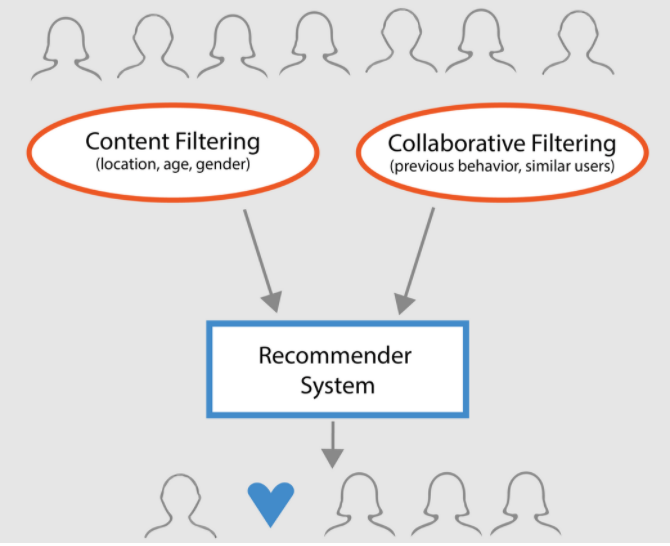


<a id="22"></a>
### Content Based: 

Content Based movie recommender systems suggest items based on similarity to a movie that they already positively rated/interacted with. In the context of movies, such a system could use features such as director, cast, genre or description of a movie to make recommendations.

Though content-based filtering doesn't need any data about users to make recommendations, a drawback is it tends to return on average items in a similar category with little variation across the recommendations.


<a id="23"></a>
### Collaborative Filtering: 

Collaborative filtering movie recommender systems are said to be more widely used and make recommendations to users based on the similarity between users, in this case it would be the recommendation of a movie or the likely prediction a user could rate a movie based on the ratings of similar users.

Though they are widely used in the industry, one of the drawbacks of collaborative filtering is the so called `cold start problem` when it comes to new users, as the system does not have sufficient data on the user to make accurate predictions.

Unlike content based methods, collaborative algorithms return more varied results, enabling the business to introduce users to new types of content, hence increasing viewage and profit. It is for this reason that we use Collaborative filtering as our main approach. The tested models are all implemented from sklean's `surprise` package. The algorithms are tested below and their results summarised in the table in the comet section.

<a id="24"></a>
### Similarity Measure

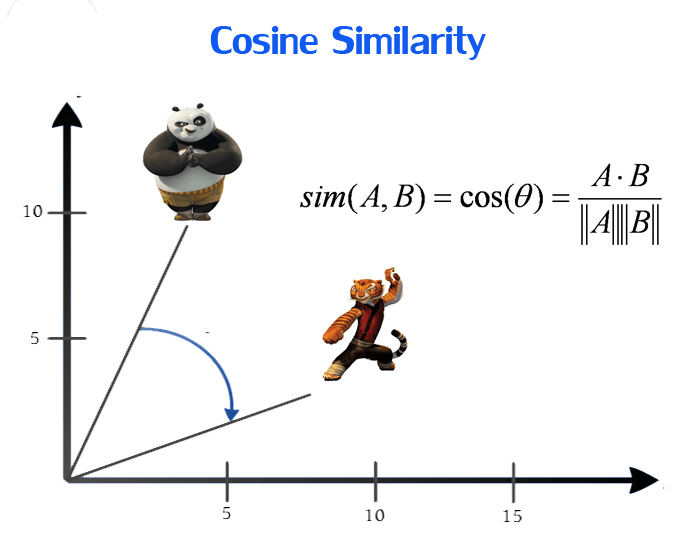

To conclude on recommender systems, similarity measure plays a big role when it comes to making recommendation of a movie or predictions of a rating. Other distance similarity measures can be used such as the Jaccard distance but for the algorithms in this notebook, the cosine similarity was employed.

According to an article in [towardsdatascience](https://towardsdatascience.com/using-cosine-similarity-to-build-a-movie-recommendation-system-ae7f20842599), `Cosine similarity` is a metric used to measure how similar two items are. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The output value ranges from 0–1. 0 means no similarity, where as 1 means that both the items are 100% similar.


# 4.0 <a id="model"><strong>MODELLING</strong></a>
[Table of Contents](#contents)

In this phase, we selected the features (variables) that will contribute to our model. Not all features will be relevant. We built a clustering model; this will include applying multiple algorithms to get the best model. Once we have decided on the best algorithm, we will train our model on the input data.<br>

* ### More On Clustering Models:
* Clustering models allow you to categorize records into a certain number of clusters. This can help you identify natural groups in your data.<br>
* Clustering models focus on identifying groups of similar records and labeling the records according to the group to which they belong. This is done without the benefit of prior knowledge about the groups and their characteristics. In fact, you may not even know exactly how many groups to look for. This is what distinguishes clustering models from the other machine-learning techniques—there is no predefined output or target field for the model to predict. These models are often referred to as <b>unsupervised learning models</b>, since there is no external standard by which to judge the model's classification performance. There are no right or wrong answers for these models. Their value is determined by their ability to capture interesting groupings in the data and provide useful descriptions of those groupings.<br>
* Clustering methods are based on measuring distances between records and between clusters. Records are assigned to clusters in a way that tends to minimize the distance between records belonging to the same cluster.

Read [More](https://www.ibm.com/docs/en/sdm/18.0.0?topic=models-building-clustering-model)


# 4.1 <a id="modelpreprocessing"><strong>MODEL PREPROCESSING</strong></a>
[Table of Contents](#contents)

This section looks at normalizing, transforming, and creating quantiles, and discusses why quantiles are the best default choice for transforming any data distribution.

[Read More](https://developers.google.com/machine-learning/clustering/prepare-data)

<a id="26"></a>
### **Splitting of Training and Validation Sets**

To load a dataset from the pandas dataframe, we will use the `load_from_df()` method. We will also use a `Reader` object with the `rating_scale` parameter specified. The dataframe must have three columns, corresponding to the user ids, the item ids, and the ratings in this order. Each row thus corresponds to a given rating.

In [ ]:
# Define sample size of 500 000 taken from train dataset
# The samples are taken without replacement
train_sample = train.sample(n = 500000, replace = False)
# Drop the timestamp column as it is not needed
data = train_sample.drop('timestamp', axis = 1)
# Define the Reader object by specifying the rating scale in the dataset
reader = Reader(rating_scale=(0.5, 5), line_format='user item rating') 
# Load the dataset from the pandas dataframe
data = Dataset.load_from_df(data, reader)

# Splitting dataset into train and validation sets
train_set, val_set = train_test_split(data, test_size=0.15, random_state=42)


# 4.2 <a id="modeltraining"><strong>MODEL TRAINING</strong></a>
[Table of Contents](#contents)


# 4.2.1 <a id="model1"><strong>MODEL 1</strong></a>
[Table of Contents](#contents)


<a id="KNNB"></a>
### KNN Basic

The `KNNBasic` is a basic nearest-neighbor based collaborative filtering algorithm derived from the
basic nearest-neighbor approach.

![image.png](https://drive.google.com/uc?export=view&id=1wnK97Alb4hYATXsA-IxD3sG5ZyZALck_)


In [ ]:
# Modeling

kSplit = model_selection.split.KFold(n_splits=5, shuffle=True)

sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }

collabKNN = KNNBasic(k=40, sim_options=sim_options)

rmseKNN = []
rmseSlope = []

for trainset, testset in kSplit.split(data):  # iterate through the folds
    collabKNN.fit(trainset)
    predictionsKNN = collabKNN.test(testset)
    # get root means squared error
    rmseKNN.append(surprise.accuracy.rmse(predictionsKNN, verbose=True))

# Dictionary for the data to log for KNN basic model
params = {'k': 40, 'sim_options': {'name': 'cosine', 'user_based': False},
          'model_type': 'KNN_basic'}
metrics = {'RMSE': surprise.accuracy.rmse(predictionsKNN, verbose=True)}

# Log the parameters and results for the KNN basic model
experiment.log_parameters(params)
experiment.log_parameters(metrics)

# End the experiment for the KNN basic experiment
experiment.end()

# 4.2.2 <a id="model2"><strong>MODEL 2</strong></a>
[Table of Contents](#contents)


<a id="28"></a>
### CoClustering

This is an implementation of collaborating filtering algorithm based on co-clustering. In this
algorithm, users and items are classified into different clusters and co-clusters. The prediction
rating 𝑟𝑢𝑖 according to this algorithm is defined as:

![image.png](https://drive.google.com/uc?export=view&id=1lVQH3TbSrHIEEGorZl2y-_10AP9PZ9Is)

In [ ]:
# Modeling
kSplit = model_selection.split.KFold(n_splits=5, shuffle=True)
coClus = surprise.prediction_algorithms.co_clustering.CoClustering(n_cltr_u=4,
                                                                   n_cltr_i=4,
                                                                   n_epochs=25)
rmseCo = []
for trainset, testset in kSplit.split(data):  # iterate through the folds
    coClus.fit(trainset)
    predictionsCoClus = coClus.test(testset)
    # get root means squared error
    rmseCo.append(surprise.accuracy.rmse(predictionsCoClus, verbose=True))

# Dictionary for the data to log for CoClustering model
params = {'user_cluster': 4, 'item_cluster': 4,
          'n_ephocs': 25, 'model_name': 'CoClustering'}
metrics = {'RMSE': surprise.accuracy.rmse(predictionsCoClus, verbose=True)}

# Log the parameters and results for the CoClustering model
experiment.log_parameters(params)
experiment.log_parameters(metrics)

# End the experiment for the CoClustering experiment
experiment.end()


# 4.2.3 <a id="model3"><strong>MODEL 3</strong></a>
[Table of Contents](#contents)


<a id="29"></a>
### Baseline Only 
The `BaselineOnly` algorithm predicts the baseline estimate for a given user. This is based on the average rating from the entire ratings from the database and it is calculated as:

![picture](https://drive.google.com/uc?export=view&id=1mXup-c0uLykvoofwlcFNUxt-lUmHmGy-)


In [ ]:
# Modeling
kSplit = model_selection.split.KFold(n_splits=5, shuffle=True)
BLO = surprise.prediction_algorithms.BaselineOnly()
rmseBLO = []
# iterate through the folds.
for trainset, testset in kSplit.split(data):
    BLO.fit(trainset)
    BLOPreds = BLO.test(testset)
    # get root means squared error
    rmseBLO.append(surprise.accuracy.rmse(BLOPreds, verbose=True))

# Dictionary for the data to log for BLO model
paramns = {'model_name': 'BaseLineOnly'}
metrics = {'RMSE': surprise.accuracy.rmse(BLOPreds, verbose=True)}

# Log the parameters and results for the BLO model
experiment.log_parameters(params)
experiment.log_parameters(metrics)

# End the experiment for the BLO experiment
experiment.end()


<a id="30"></a>
### Tuned BaselineOnly


In [ ]:
# Modeling
train_set, val_set = train_test_split(data, test_size=0.15, random_state=42)
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
bl_algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(bl_algo, data, measures=['RMSE'], cv=5, verbose=False)
bl_predictions = bl_algo.fit(train_set).test(val_set)
accuracy.rmse(bl_predictions)

# Dictionary for the data to log for baseline_tuned model
params = {'model_name': 'Baseline_tuned'}
metrics = {'RMSE': accuracy.rmse(bl_predictions)}

# Log the parameters and results for the baseline_tuned model
experiment.log_parameters(params)
experiment.log_parameters(metrics)
# End the experiment for the baseline_tuned experiment
experiment.end()


<a id="31"></a>
### KNNWithMeans

The `KNNWithMeans` is also a basic nearest-neighbor based collaborative filtering algorithm which
takes mean rating of each user into account.

![image.png](https://drive.google.com/uc?export=view&id=1a_3nZkvUmDX4rb3Tz-5iNUznipfRm05z)

In [ ]:
# Modeling
kSplit = model_selection.split.KFold(n_splits=5, shuffle=True)
KNNMeans = surprise.prediction_algorithms.KNNWithMeans(sim_options=sim_options)
rmseKNNMeans = []
for trainset, testset in kSplit.split(data):  # iterate through the folds
    KNNMeans.fit(trainset)
    KNNMeansPreds = KNNMeans.test(testset)
    # Get root means squared error
    rmseKNNMeans.append(surprise.accuracy.rmse(KNNMeansPreds, verbose=True))

# Dictionary for the data to log for KNNMeans model
params = {'model_name': 'KNNWithMeans'}
metrics = {'RMSE': surprise.accuracy.rmse(KNNMeansPreds, verbose=True)}

# Log the parameters and results for the KNNMeans model
experiment.log_parameters(params)
experiment.log_parameters(metrics)
# End the experiment for the KNNMeans experiment
experiment.end()


<a id="32"></a>
### KNNWithZscore

The `KNNWithZScore` is also a basic nearest-neighbor based collaborative filtering algorithm which
takes the z-score normalization of each user into account.

![image.png](https://drive.google.com/uc?export=view&id=1Mc-2kWzavtkC0cd3QB-1oblB9KHomhtQ)

In [ ]:
# Modeling
kSplit = model_selection.split.KFold(n_splits=5, shuffle=True)
KNNZsco = surprise.prediction_algorithms.KNNWithZScore(sim_options=sim_options)
rmseKNNZscore = []
for trainset, testset in kSplit.split(data):  # iterate through the folds.
    KNNZsco.fit(trainset)
    KNNZscorePreds = KNNZsco.test(testset)
    # Get root means squared error
    rmseKNNZscore.append(surprise.accuracy.rmse(KNNZscorePreds, verbose=True))

# Dictionary for the data to log for KNNWithZScore model
params = {'model_name': 'KNNWithZscore'}
metrics = {'RMSE': surprise.accuracy.rmse(KNNZscorePreds, verbose=True)}

# Log the parameters and results for the KNNWithZscore model
experiment.log_parameters(params)
experiment.log_parameters(metrics)
# End the experiment for the KNNWithZscore experiment
experiment.end()


<a id="33"></a>
### KNNBaseline

The `KNNBaseline` is also a basic nearest-neighbor based collaborative filtering algorithm which
takes mean rating of each user into account.

![image.png](https://drive.google.com/uc?export=view&id=1sPKkdMd06aZcz7O5y2EIV9gTcEf3flCv)

In [ ]:
# Modeling
kSplit = model_selection.split.KFold(n_splits=5, shuffle=True)
KNNBaseL = surprise.prediction_algorithms.KNNBaseline(sim_options=sim_options)
rmseKNNBaseL = []
for trainset, testset in kSplit.split(data):  # iterate through the folds.
    KNNBaseL.fit(trainset)
    KNNBaseLPreds = KNNBaseL.test(testset)
    # Get root means squared error
    rmseKNNBaseL.append(surprise.accuracy.rmse(KNNBaseLPreds, verbose=True))

# Dictionary for the data to log for KNNBaseLine model
params = {'model_name': 'KNNBaseLine'}
metrics = {'RMSE': surprise.accuracy.rmse(KNNBaseLPreds, verbose=True)}

# Log the parameters and results for the KNNBaseLine model
experiment.log_parameters(params)
experiment.log_parameters(metrics)
# End the experiment for the KNNBaseLine experiment
experiment.end()


<a id="34"></a>
### Non-negative Matrix Factorization (NMF)

This is a non-negative matrix approximation where a matrix is factorized into (usually) two matrices, with the property that all three matrices have no negative elements.

![image.png](https://drive.google.com/uc?export=view&id=1mMWao1jPUJWOIz6rcGtOfoyK5iBxYCVx)

In [ ]:
# Modelling
kSplit = model_selection.split.KFold(n_splits=5, shuffle=True)
NMF = surprise.prediction_algorithms.NMF()
rmseNMF = []
for trainset, testset in kSplit.split(data): #iterate through the folds.
    NMF.fit(trainset)
    NMFPreds = NMF.test(testset)
    rmseNMF.append(surprise.accuracy.rmse(NMFPreds,verbose=True))#get root means squared error

    
# Dictionary for the data to log for the NMF model
params = {'model_name': 'NMF'}
metrics = {'RMSE': surprise.accuracy.rmse(NMFPreds,verbose=True)}

# Log the parameters and results for the NMF model
experiment.log_parameters(params)
experiment.log_parameters(metrics)
# End the experiment for the NMF experiment

<a id="35"></a>
### Singular Value Decomposition (SVD)

Singular Value Decomposition is a matrix decomposition method for reducing the number of features of a dataset by reducing the space dimension from N-dimension to K-dimension (where K<N). In the context of this project, the SVD is used as a collaborative filtering technique. It uses a matrix structure where each row represents a user, and each column represents an item. The elements of this matrix are the ratings that are given to items by users.
<div align="center" ">
<img src="https://miro.medium.com/max/313/1*-wHEGA5UHBK4-Bejlbr__A.png"
     style="float: center; padding-bottom=0.5em"
     width=400px/>
</div>

where A is an m x n matrix, U is an (m x m) orthogonal matrix, 𝚺 is an (m x n) nonnegative rectangular diagonal matrix, and V is an (n x n) orthogonal matrix.

U is also referred to as the left singular vectors, 𝚺 the singular values, and V the right singular vectors

In [ ]:
# Define the SVD algorithm class
svd_algo = SVD()
# Fitting the model on the train_set
svd_algo.fit(train_set)
# Predicting on the validation set
svd_predictions = svd_algo.test(val_set)
# Calculating the RMSE of the predictions
accuracy.rmse(svd_predictions)

# Dictionary for the data to log for SVD model
params = {'model_name': 'SVD'}
metrics = {'RMSE': accuracy.rmse(svd_predictions)}

# Log the parameters and results for the SVD model
experiment.log_parameters(params)
experiment.log_parameters(metrics)
# End the experiment for the SVD experiment
experiment.end()

<a id="39"></a>
***
## **Hyperparameter Tuning of Best Model**
***

In [ ]:
rating_scale = Reader(rating_scale=(0.5, 5))
train_df = Dataset.load_from_df(train.drop('timestamp', axis=1), rating_scale)

# Training and validation set split for hypertuning
train_set, val_set = train_test_split(train_df,
                                      test_size=0.008,
                                      random_state=42)

# Modelling of the SVD hypertuning
svd_algo_hyper = SVD(n_factors=160, 
                     lr_all=0.0085,
                     reg_all=0.02,
                     n_epochs=20,
                     init_std_dev=0.01)
svd_algo_hyper.fit(train_set)

# Predicting on the validation set
svd_hyper_predictions = svd_algo_hyper.test(val_set)

# Convert the predictions to dataframe
#test = pd.DataFrame(predictions)
accuracy.rmse(svd_hyper_predictions)

# Dictionary for the data to log for the SVD tuned model
params = {'model_name': 'SVD_Tuned'}
metrics = {'RMSE': accuracy.rmse(svd_hyper_predictions)}

# Log the parameters and results for the SVD tuned model
experiment.log_parameters(params)
experiment.log_parameters(metrics)
# End the experiment for the SVD tuned experiment
experiment.end()


The DataFrame below is a summary of the Comet models from best performing to worst performing. It is important to note the image of the `experiments` cuts out the last module due to screenshot size. Therefore its findings are captured in the dataframe

In [ ]:
# Summary of the comet experiments
rmse_scores = [1.16, 1.04, 1.00, 1.12, 0.92, 0.91, 0.92, 1.03, 0.98, 1.04, 0.78]
models = ['NMF', 'KNN Basic', 'BaseLineOnly', 'CoClustering',
          'SVD', 'SVD_tuned', 'BaselineTuned', 'KNNwithZscore',
          'KNNBaseLine', 'KNNWithMeans', 'SVDNewTuned']
comet_scores = pd.DataFrame({'RMSE': rmse_scores}, index = models)
comet_scores.sort_values(by='RMSE')

In [ ]:
# Train model on whole dataset
reader = Reader(rating_scale=(train_df['rating'].min(), train_df['rating'].max()))
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
svd = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42, verbose=True)
svd.fit(trainset)

# Create Kaggle submission file
predictions = []
for i, row in test_df.iterrows():
    x = (svd.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
test_df['Id'] = test_df['userId'].map(str) +'_'+ test_df['movieId'].map(str)
results = pd.DataFrame({"Id":test_df['Id'],"rating": predictions})
results.to_csv("Team_ES5_submission.csv", index=False)

# 5.0 <a id="Conclusion/Recommendation"><strong>CONCLUSION AND RECOMMENDATION</strong></a>
[Table of Contents](#contents)

# 5.1 <a id="Conclusion"><strong>CONCLUSION</strong></a>
[Table of Contents](#contents)

<a id="conclusion"></a>
## 8. Conclusion
In this project, we succeeded in building an unsupervised machine learning model that is able to recommend movies based on content-based or collaborative filtering and is capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences. Our top performing model has a root mean squared error (RMSE) of 0.78, based on a testing set submitted to the EDSA [Kaggle](https://www.kaggle.com/c/edsa-recommender-system-predict/leaderboard) competition.  


The singular value decomposition (SVD) algorithm is a baseline approach to recommender systems, as it has a broad range of applications including dimensionality reduction, solving linear inverse problems, and data fitting. The SVD algorithm generally performs better on large datasets compared to some other models as it decomposes a matrix into constituent arrays of feature vectors corresponding to each row and each column.

# 5.2 <a id="Recommendation"><strong>RECOMMENDATION</strong></a>
[Table of Contents](#contents)

# 6.0 <a id="reference"><strong>REFERENCES</strong></a>
[Table of Contents](#contents)

<a id="ref"></a>
## 10. References
<a id="ref1"></a>[1] Ansari, A. (n.d.). Internet Recommendation Systems. Retrieved August/September, 2000, from https://www0.gsb.columbia.edu/mygsb/faculty/research/pubfiles/385/Internet Recommendation Systems.pdf

<a id="ref2"></a>[2] Shi, C. (2017, June 27). A Hybrid Recommender with Yelp Challenge. Retrieved from https://nycdatascience.com/blog/student-works/yelp-recommender-part-1/

<a id="ref3"></a>[3] Wikipedia: t-distributed stochastic neighbor embedding. Retrieved from https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

<a id="ref4"></a>[4] Jolliffe, I.T. & Cadima, J. (2016, April 13). Principal component analysis: a review and recent developments. Retrieved from https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202

<a id="ref5"></a>[5] Ajitsaria, A. (n.d.). Build a Recommendation Engine With Collaborative Filtering. Retrieved from https://realpython.com/build-recommendation-engine-collaborative-filtering

<a id="ref6"></a>[6] Funk, S. (2006, Deccember 11). Netflix Update: Try This at Home. Retrieved from https://sifter.org/simon/journal/20061211.html

<a id="ref7"></a>[7] Recommender Systems: Content-based Filtering. Retrieved from http://recommender-systems.org/content-based-filtering/